In [5]:
import numpy as np
import util
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from logistic_regression import LogisticRegression

# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'

In [ ]:
def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    ##########
    # PART C #
    ##########
    print('\nPart C: Train on true labels and test on Test Set')
    x_train, t_train = util.load_dataset(csv_path=train_path, label_col='t', add_intercept=False)
    x_test, t_test = util.load_dataset(csv_path=test_path, label_col='t', add_intercept=False)

    #Initiaise the logistic regression classifier and train
    clf = LogisticRegression()
    clf.fit(x_train, t_train)

    #Get model parameters
    theta_c = [0]
    for i in clf.theta.tolist():
        theta_c.append(i)

    #Produce model predictions and calculate the validation/test accuracy
    predicted_labels = clf.predict(x=x_test) #model predictions on test set
    validation_accuracy = clf.validate(predicted_labels=predicted_labels, y_eval=t_test)
    print(f"Validation accuracy (c): {validation_accuracy:.2f}")

    #Save data to prediction path.
    data = {"Predicted Labels": predicted_labels, "True Labels": t_test}
    labels_df = pd.DataFrame(data)
    labels_df.to_csv(pred_path_c, index=False)



    ##########
    # PART D #
    ##########
    print('\nPart D: Train on y-labels and test on true labels')
    x_train, y_train = util.load_dataset(csv_path=train_path, label_col='y', add_intercept=False)
    x_test, t_test = util.load_dataset(csv_path=test_path, label_col='t', add_intercept=False)

    #Initiaise the logistic regression classifier and train
    clf = LogisticRegression()
    clf.fit(x_train, y_train)

    #Get model parameters
    theta_d = [0]
    for i in clf.theta.tolist():
        theta_d.append(i)

    #Produce model predictions and calculate the validation/test accuracy
    predicted_labels = clf.predict(x=x_test) #model predictions on test set
    validation_accuracy = clf.validate(predicted_labels=predicted_labels, y_eval=t_test)
    print(f"Validation accuracy (d): {validation_accuracy:.2f}")

    #Save data to prediction path.
    data = {"Predicted Labels": predicted_labels, "True Labels": t_test}
    labels_df = pd.DataFrame(data)
    labels_df.to_csv(pred_path_d, index=False)
    


    
    ##########
    # PART E #
    ##########
    print("\nPart E: Apply correction factor using validation set and test on true labels")
    x_train, y_train = util.load_dataset(csv_path=train_path, label_col='y', add_intercept=False)
    x_eval, y_eval = util.load_dataset(csv_path=valid_path, label_col='y', add_intercept=False)
    x_eval, t_eval = util.load_dataset(csv_path=valid_path, label_col='t', add_intercept=False)

    #Initiaise the logistic regression classifier and train
    clf = LogisticRegression()
    clf.fit(x_train, y_train)

    #Get model parameters
    theta_e = [0]
    for i in clf.theta.tolist():
        theta_e.append(i)

    #Produce model predictions and calculate the validation/test accuracy
    predicted_labels = clf.predict(x=x_eval) #model predictions on test set
    validation_accuracy = clf.validate(predicted_labels=predicted_labels, y_eval=t_eval)
    print(f"Validation accuracy (e): {validation_accuracy:.2f}")

    #Save data to prediction path.
    data = {"Predicted Labels": predicted_labels, "True Labels": t_eval}
    labels_df = pd.DataFrame(data)
    labels_df.to_csv(pred_path_e, index=False)
    
    alpha = np.sum(predicted_labels) / np.sum(y_train) #alpha = prediction sum / no of labels
    print(f'Estimate for alpha: {alpha:.2f}')

    ###################
    # Plot            #
    ###################
    thetas = [theta_c, theta_d, theta_e]
    letters = ['c', 'd', 'e']

    for i, theta in enumerate(thetas):
        util.plot(x=x_test, y=t_test, theta=theta, set_label=letters[i])

    plt.show()

Part C: Train on true labels and test on Test Set
Validation accuracy (c): 0.98
Part D: Train on y-labels and test on true labels
Validation accuracy (d): 0.95
Part E: Apply correction factor using validation set and test on true labels
Validation accuracy (e): 0.93
Estimate for alpha: 0.57


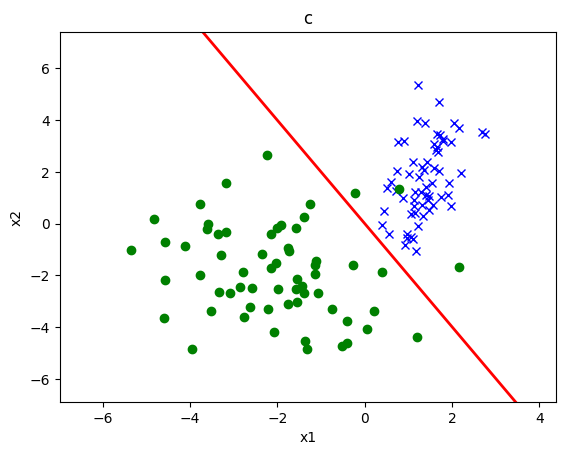

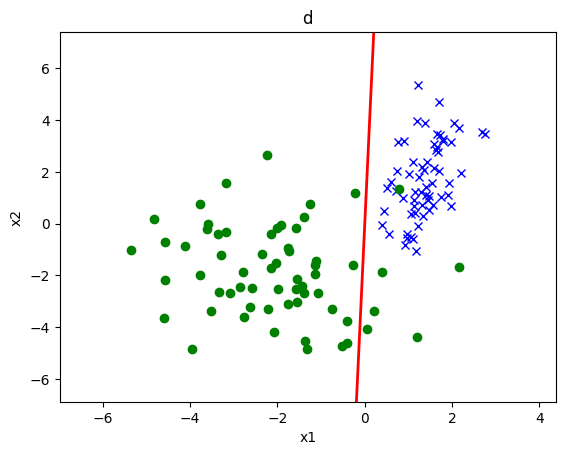

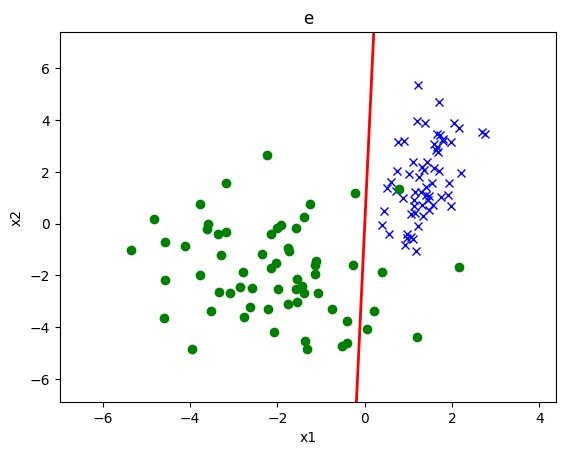

In [8]:
train_path = './data/ds3_train.csv'
valid_path = './data/ds3_valid.csv'
test_path = './data/ds3_test.csv'
pred_path = './predictions/2X.csv'

main(train_path=train_path, valid_path=valid_path, test_path=test_path, pred_path=pred_path)